In [111]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width: 100% !important; }</style>"))

import pandas as pd
from pandas.plotting import scatter_matrix as scatmat
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn import model_selection
import sklearn.metrics as sk_metrics
from sklearn import linear_model
import eli5.sklearn

import numpy as np
calHousingDf = pd.read_csv('https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv', sep=',')
calHousingDf = calHousingDf.reindex(np.random.permutation(len(calHousingDf)))
calHousingDf['median_house_value']/=1000

LinearRegression     9758     4898
LinearRidge          9758     4898
LinearRidgeCV        9758     4898
ElasticNet           9825     4949
StochGradDescReg     9761     4901
RANSAC              11704     5860


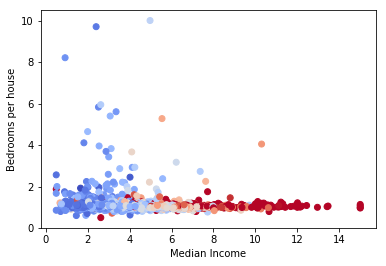

In [3]:
calHousingDf['bedrooms_per_house'] = calHousingDf['total_bedrooms'] / calHousingDf['households']
calHousingDf['bedrooms_per_house'] = calHousingDf['bedrooms_per_house'].apply(lambda x: min(x,10))
x = calHousingDf[['median_income','bedrooms_per_house']].values
y = np.ravel(calHousingDf[['median_house_value']].values)

regressionModels = [
        ('LinearRegression', linear_model.LinearRegression()),
        ('LinearRidge', linear_model.Ridge(alpha=0.05)),
        ('LinearRidgeCV', linear_model.RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])),
        ('ElasticNet', linear_model. ElasticNet(random_state=0)),
        ('StochGradDescReg', linear_model.SGDRegressor(max_iter=1000, tol=0.001)),
        ('RANSAC', linear_model.RANSACRegressor())
         ]

validationPct = 0.20
seed = 7
nSplits = 10

xTrain, xValid, yTrain, yValid = model_selection.train_test_split(x, y, test_size=validationPct, random_state=seed)

scoring = 'accuracy'
results = []


linearReg = linear_model.LinearRegression()
linearRegModel = linearReg.fit(xTrain, yTrain)


myModels = []
for (modelName, regModel) in regressionModels:
    reg = regModel.fit(xTrain, yTrain)
    trainError = np.sqrt(np.sum(np.power(reg.predict(xTrain) - yTrain, 2)))  #RMS Error
    validationError = np.sqrt(np.sum(np.power(reg.predict(xValid) - yValid, 2)))  #RMS Error
    print('{:<16} {:>8.0f}   {:>6.0f}'.format(modelName, trainError, validationError) )
    
    myModels.append(reg)

minValid = np.min(yValid)
maxValid = np.max(yValid)
sclFunc = lambda y: (y - minValid)/(maxValid-minValid)
plt.xlabel("Median Income")
plt.ylabel("Bedrooms per house")
plt.scatter(xValid[:,0], xValid[:,1], color=cm.coolwarm(sclFunc(yValid)) )
plt.show()


In [47]:
np.ravel(yTrain)

array([189.9  , 208.   , 202.1  , ..., 500.001,  53.5  , 446.8  ])

In [28]:
np.hstack([linearRegModel.predict(xValid), yValid])

array([[ 92741.23561747,  50700.        ],
       [124576.75885296, 300000.        ],
       [264826.385003  , 281100.        ],
       ...,
       [116869.00183866,  62800.        ],
       [250623.36374066, 159800.        ],
       [121062.80217425,  47100.        ]])

In [ ]:
# kfold = model_selection.KFold(n_splits=nSplits, random_state=seed)
# for name, model in models:
#     crossVals = model_selection.cross_val_score(model, xTrain, yTrain, cv=kfold, scoring=scoring)
#     results.append(crossVals)
#     print([name, crossVals.mean(), crossVals.std()])

In [213]:
vesicleCalibDf.describe()
vesicleCalibDf.corr()
vesicleCalibDf

,Date,Material,Run,Sample,thresh_area_200,mean_value_200,thresh_area_300,mean_value_300,max_value,total_illum_200,half_max_area,area_rms,dic_min_area,diameter_rms,min_diameter,mean_excess_200,sharpness
0,CHOL50_11-03.1,Cholesterol 50%,1,A,12.706,477.669,6.800,442.169,2034,0.706950,27.729,16.225,16.225,4.066399,4.545142,277.669,4.258179
1,CHOL50_11-03.1,Cholesterol 50%,1,B,24.810,971.595,17.427,1280.975,3054,2.807910,78.294,14.423,14.423,5.249108,4.285316,771.595,3.143285
2,CHOL50_11-03.1,Cholesterol 50%,1,C,7.812,283.527,3.176,342.081,394,0.258010,27.643,6.095,6.095,3.423823,2.785749,83.527,1.389638
3,CHOL50_11-03.1,Cholesterol 50%,1,D,10.817,389.976,7.040,465.988,687,0.491370,22.922,7.297,7.297,3.836251,3.048086,189.976,1.761647
4,CHOL50_11-03.1,Cholesterol 50%,1,E,13.736,355.613,7.898,437.141,705,0.568980,33.309,12.191,12.191,4.184688,3.939805,155.613,1.982492
5,CHOL50_11-03.1,Cholesterol 50%,1,F,22.922,489.993,11.675,680.515,1282,1.308280,52.282,24.553,24.553,5.087726,5.591230,289.993,2.616364
6,CHOL50_11-03.1,Cholesterol 50%,1,G,23.694,496.072,17.170,593.340,2222,1.369160,51.681,24.810,24.810,5.154489,5.620416,296.072,4.479189
7,CHOL50_11-03.1,Cholesterol 50%,1,H,20.775,311.876,12.105,359.688,444,0.754740,39.576,25.497,25.497,4.895899,5.697700,111.876,1.423643
8,CHOL50_11-03.1,Cholesterol 50%,1,I,18.973,330.145,10.731,393.832,636,0.574914,58.034,12.362,12.362,4.727096,3.967340,130.145,1.926426
9,CHOL50_11-03.1,Cholesterol 50%,1,J,83.274,1165.297,67.649,1377.836,3825,11.303380,185.090,58.549,58.549,8.709764,8.634055,965.297,3.282425


In [220]:

df

,Date,Material,Run,Sample,thresh_area_200,mean_value_200,thresh_area_300,mean_value_300,max_value,total_illum_200,half_max_area,area_rms,dic_min_area,diameter_rms,min_diameter
0,CHOL50_11-03.1,Cholesterol 50%,1,A,12.706,477.669,6.800,442.169,2034,0.706950,27.729,16.225,16.225,4.066399,4.545142
1,CHOL50_11-03.1,Cholesterol 50%,1,B,24.810,971.595,17.427,1280.975,3054,2.807910,78.294,14.423,14.423,5.249108,4.285316
2,CHOL50_11-03.1,Cholesterol 50%,1,C,7.812,283.527,3.176,342.081,394,0.258010,27.643,6.095,6.095,3.423823,2.785749
3,CHOL50_11-03.1,Cholesterol 50%,1,D,10.817,389.976,7.040,465.988,687,0.491370,22.922,7.297,7.297,3.836251,3.048086
4,CHOL50_11-03.1,Cholesterol 50%,1,E,13.736,355.613,7.898,437.141,705,0.568980,33.309,12.191,12.191,4.184688,3.939805
5,CHOL50_11-03.1,Cholesterol 50%,1,F,22.922,489.993,11.675,680.515,1282,1.308280,52.282,24.553,24.553,5.087726,5.591230
6,CHOL50_11-03.1,Cholesterol 50%,1,G,23.694,496.072,17.170,593.340,2222,1.369160,51.681,24.810,24.810,5.154489,5.620416
7,CHOL50_11-03.1,Cholesterol 50%,1,H,20.775,311.876,12.105,359.688,444,0.754740,39.576,25.497,25.497,4.895899,5.697700
8,CHOL50_11-03.1,Cholesterol 50%,1,I,18.973,330.145,10.731,393.832,636,0.574914,58.034,12.362,12.362,4.727096,3.967340
9,CHOL50_11-03.1,Cholesterol 50%,1,J,83.274,1165.297,67.649,1377.836,3825,11.303380,185.090,58.549,58.549,8.709764,8.634055


LinearRegression      rms:  3.40      abs:  2.94      med:  2.50
LinearRidge           rms:  3.40      abs:  2.94      med:  2.50
LinearRidgeCV         rms:  3.40      abs:  2.94      med:  2.50
ElasticNet            rms:  3.40      abs:  2.94      med:  2.50
StochGradDescReg      rms: 11.63      abs:  8.10      med:  6.00
RANSAC                rms:  3.44      abs:  2.84      med:  2.56


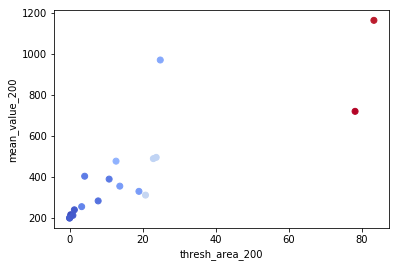

[' thresh_area_200', '  mean_value_200']         bias
['          0.7614', '         -0.0065']       4.5889


Weight,Feature
1.5225 ± 1.6254,thresh_area_200
0.0296 ± 0.0194,mean_value_200


In [258]:
def read_particle_data(fileName):
    df = pd.read_csv(fileName)
    lookup = {'thresh_area_200':0.0, 'thresh_area_300':0.0, 'mean_value_200':200.0, 'mean_value_300':300.0, 'total_illum_200':0.0}
    df.fillna(value=lookup, inplace=True)
    df['mean_value_200'] = df['mean_value_200'].apply(lambda val: max(val,200))
    df['mean_value_300'] = df['mean_value_300'].apply(lambda val: max(val,300))
    df['mean_excess_200'] = df['mean_value_200'] - 200.
    df['sharpness'] = df['max_value']/df['mean_value_200']
    df = df[df['area_rms']<70]
    return df

def scale_particle_data(df):
    df['thresh_area_200'] /= 100  #this arbitrary 'max' is about the largest particle we want to deal with
    df['thresh_area_300'] /= 100
    df['mean_value_200'] /= 4095  #scale is max value used on sensor. there are many factors involed, depends on video. In the tracking applicaiton we scale 0-255 anyway, so use 255 there if want to scale
    df['mean_value_300'] /= 4095
    df['mean_excess_200'] = df['mean_value_200'] - 200./4095.
    df['max_value'] /= 4095.
    df['total_illum_200'] /= 10   # a derived measurement: integral of illumination in 200-thresholded region after the background has been subtracted (there's usually background noise around 80-100 level). in application, just the sum after preprocessing masked by contour
    df['area_rms'] /= 100
    return df

def gen_cross_features(featureList, dataFrame, excludeSelfCross=True):
    nFeatures = len(featureList)
    for featIdxA in range(nFeatures-excludeSelfCross):
        featA = featureList[featIdxA]
        for featIdxB in range(featIdxA+excludeSelfCross, nFeatures):
            featB = featureList[featIdxB]
            featComp = featA + '<>' + featB
            dataFrame[featComp] = dataFrame[featA]*vesicleCalibDf[featB]
            featureList.append(featComp)
    
    return featureList, dataFrame  #it actually modifies these params in place so no need to return them... although may want to copy and return new objects

def gen_cross_and_inverse_features(featureList, dataFrame):
    nFeatures = len(featureList)
    for featIdxA in range(nFeatures):
        featA = featureList[featIdxA]
        for featIdxB in range(featIdxA, nFeatures):
            featB = featureList[featIdxB]
            featCompMult = featA + '_*_' + featB
            dataFrame[featCompMult] = dataFrame[featA]*dataFrame[featB]
            featureList.append(featCompMult)
            
            featCompDiv = featA + '_/_' + featB
            if featA == featB:
                dataFrame[featCompDiv] = 1.0/(dataFrame[featA]+0.001)
            else:
                dataFrame[featCompDiv] = dataFrame[featA]/(dataFrame[featB]+0.001)
            featureList.append(featCompDiv)
            
    
    return featureList, dataFrame  #it actually modifies these params in place so no need to return them... although may want to copy and return new objects

#fileName = 'E:/Box Sync/Vesicle Deformability/Results/fluor size calibration/learn_input.csv'
fileName = 'E:/Box Sync/Vesicle Deformability/Input Video/Size Calibration/2017-11-03/learn_input.csv'
vesicleCalibDf = read_particle_data(fileName)
#vesicleCalibDf = scale_particle_data_scaled(vesicleCalibDf)  #doesn't seem to matter at all with data I've tried. Might matter more depending on resolution and illumination levels in video (i.e. max brightness value like 64k or something)

#featureList = ['thresh_area_200', 'mean_value_200', 'max_value','total_illum_200', 'half_max_area']
featureList = ['thresh_area_200', 'mean_value_200', 'max_value','total_illum_200']
#featureList = ['thresh_area_200' 'mean_value_200', 'max_value', 'sharpness']
#featureList = ['thresh_area_300', 'mean_value_300']
#featureList = ['thresh_area_200', 'sharpness']
#featureList = ['thresh_area_200', 'total_illum_200']
featureList = ['thresh_area_200', 'mean_value_200']

# #not really enough labelled measurements or physical meaning to justify higher order terms, but they give a slightly better fit...
#featureList, vesicleCalidDf = gen_cross_features(featureList, vesicl)
#gen_cross_features(featureList, vesicleCalibDf, False)
#gen_cross_and_inverse_features(featureList, vesicleCalibDf)

#featureList = ['thresh_area_200', 'thresh_area_200<>total_illum_200']

targetLabel = 'area_rms'
#targetLabel = 'diameter_rms'
featureData = vesicleCalibDf[featureList].values
targetData = vesicleCalibDf[targetLabel].values

regressionModels = [
        ('LinearRegression', linear_model.LinearRegression()),
        ('LinearRidge', linear_model.Ridge(alpha=0.05, solver='cholesky', copy_X=True, max_iter=2000, fit_intercept=True)),  #‘svd’, ‘cholesky’, ‘lsqr’, ‘sparse_cg’, ‘sag’, ‘saga’
        ('LinearRidgeCV', linear_model.RidgeCV(alphas=[0.01, 0.1, 1.0, 10.0])),
        ('ElasticNet', linear_model. ElasticNet(random_state=0)),
        ('StochGradDescReg', linear_model.SGDRegressor(max_iter=10000, tol=0.1, eta0=0.0001, power_t=0.5)),
        ('RANSAC', linear_model.RANSACRegressor())
         ]

myModels = {}
resultDf = pd.DataFrame()
resultDf[featureList] = vesicleCalibDf[featureList]
resultDf['target'] = targetData

for (modelName, regModel) in regressionModels:
    reg = regModel.fit(featureData, targetData)
    rmsError = np.sqrt(np.mean(np.power(reg.predict(featureData) - targetData, 2.0)))  #RMS Error, math is fun: np.sqrt(sk_metrics.mean_squared_error(reg.predict(featureData), targetData))
    avgError = np.mean(np.abs(reg.predict(featureData) - targetData))                  #average absolute error
    medianError = sk_metrics.median_absolute_error(reg.predict(featureData), targetData)
    print('{:<16}      rms:{:>6.2f}      abs:{:>6.2f}      med:{:>6.2f}'.format(modelName, rmsError, avgError, medianError))

    myModels[modelName] = (reg if modelName != 'RANSAC' else reg.estimator_)
    resultDf[modelName] = reg.predict(featureData) 

if len(featureList) > 1:
    minValid = np.min(targetData)
    maxValid = np.max(targetData)
    sclFunc = lambda y: (y - minValid)/(maxValid-minValid)
    plt.xlabel(featureList[0])
    plt.ylabel(featureList[1])
    plt.scatter(featureData[:,0], featureData[:,1], color=cm.coolwarm(sclFunc(targetData)) )
    plt.show()

modelForDetail = 'RANSAC'
print(['{:>16}'.format(feature) for feature in featureList], '{:>12}'.format('bias') )
print(['{:>16.4f}'.format(coef) for coef in myModels[modelForDetail].coef_], '{:>12.4f}'.format(myModels[modelForDetail].intercept_) )

resultDf.describe()

testModel = myModels[modelForDetail]
perm = eli5.sklearn.PermutationImportance(testModel, random_state=1).fit(featureData, targetData)
eli5.show_weights(perm, feature_names=featureList)



In [192]:
myModels['RANSAC'].coef_

array([0.25005748, 2.6155025 ])

In [232]:
vesicleCalibDf[]

,Date,Material,Run,Sample,thresh_area_200,mean_value_200,thresh_area_300,mean_value_300,max_value,total_illum_200,half_max_area,area_rms,dic_min_area,diameter_rms,min_diameter,mean_excess_200,sharpness
0,CHOL50_11-03.1,Cholesterol 50%,1,A,12.706,477.669,6.800,442.169,2034,0.706950,27.729,16.225,16.225,4.066399,4.545142,277.669,4.258179
1,CHOL50_11-03.1,Cholesterol 50%,1,B,24.810,971.595,17.427,1280.975,3054,2.807910,78.294,14.423,14.423,5.249108,4.285316,771.595,3.143285
2,CHOL50_11-03.1,Cholesterol 50%,1,C,7.812,283.527,3.176,342.081,394,0.258010,27.643,6.095,6.095,3.423823,2.785749,83.527,1.389638
3,CHOL50_11-03.1,Cholesterol 50%,1,D,10.817,389.976,7.040,465.988,687,0.491370,22.922,7.297,7.297,3.836251,3.048086,189.976,1.761647
4,CHOL50_11-03.1,Cholesterol 50%,1,E,13.736,355.613,7.898,437.141,705,0.568980,33.309,12.191,12.191,4.184688,3.939805,155.613,1.982492
5,CHOL50_11-03.1,Cholesterol 50%,1,F,22.922,489.993,11.675,680.515,1282,1.308280,52.282,24.553,24.553,5.087726,5.591230,289.993,2.616364
6,CHOL50_11-03.1,Cholesterol 50%,1,G,23.694,496.072,17.170,593.340,2222,1.369160,51.681,24.810,24.810,5.154489,5.620416,296.072,4.479189
7,CHOL50_11-03.1,Cholesterol 50%,1,H,20.775,311.876,12.105,359.688,444,0.754740,39.576,25.497,25.497,4.895899,5.697700,111.876,1.423643
8,CHOL50_11-03.1,Cholesterol 50%,1,I,18.973,330.145,10.731,393.832,636,0.574914,58.034,12.362,12.362,4.727096,3.967340,130.145,1.926426
9,CHOL50_11-03.1,Cholesterol 50%,1,J,83.274,1165.297,67.649,1377.836,3825,11.303380,185.090,58.549,58.549,8.709764,8.634055,965.297,3.282425


In [259]:
resultDf.describe()
resultDf

,thresh_area_200,mean_value_200,target,LinearRegression,LinearRidge,LinearRidgeCV,ElasticNet,StochGradDescReg,RANSAC
0,12.706,477.669,16.225,11.300490,11.300603,11.300512,11.350123,16.772804,11.169575
1,24.810,971.595,14.423,16.359305,16.359726,16.359389,16.546297,34.113306,17.186660
2,7.812,283.527,6.095,9.204753,9.204747,9.204752,9.201133,9.956557,8.700642
3,10.817,389.976,7.297,10.606869,10.606925,10.606880,10.630713,13.694901,10.299226
4,13.736,355.613,12.191,13.213932,13.213919,13.213930,13.207919,12.499761,12.744220
5,22.922,489.993,24.553,19.226476,19.226474,19.226476,19.226026,17.235147,18.867999
6,23.694,496.072,24.810,19.778902,19.778896,19.778901,19.776779,17.450430,19.416416
7,20.775,311.876,25.497,19.147095,19.146954,19.147067,19.085140,10.988545,18.386795
8,18.973,330.145,12.362,17.564275,17.564174,17.564255,17.519544,11.623189,16.896483
9,83.274,1165.297,58.549,60.604839,60.604714,60.604813,60.555758,41.074505,60.445444


In [176]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2, include_bias=False)  # (x,y) -> (x, y, x^2, xy, y^2)

print(featureData[1])
print(poly.fit_transform(featureData)[1])

[11.2         1.51921682]
[ 11.2          1.51921682 125.44        17.01522843   2.30801976]


In [190]:
modelForDetail = 'RANSAC'
predictedData = myModels[modelForDetail].predict(featureData)
print(myModels[modelForDetail].intercept_)   #model bias/intercept/w_0
print(myModels[modelForDetail].coef_)        #coefficients for each feature in order given in featureData
print(myModels[modelForDetail].score(featureData, targetData))   #R^2 error from fit
print(myModels[modelForDetail].predict([featureData[0]]))        #use model to predict value
print(np.sum(myModels[modelForDetail].coef_*featureData[0]) + myModels[modelForDetail].intercept_)  #coef_[idx] = weight[idx] for feature[idx].  y = coef_*featureData + intercept_ (i.e. coef does not include the bias weight/intercept)
print(sk_metrics.regression.explained_variance_score(predictedData,targetData))
print(featureList)


1.1820051808720216
[0.26385205 1.91620892]
0.7247395799581258
[12.16016718]
12.160167178339332
0.6191110439697847
['thresh_area_200', 'sharpness']


In [82]:
from sklearn.feature_selection import RFE

estModel = linear_model.LinearRegression()
rfeSelector = RFE(estimator=estModel, n_features_to_select=2)
rfeFit = rfeSelector.fit(featureData, targetData)
print(rfeFit.support_)
print(rfeFit.ranking_)

usefulFeatures = [featureList[idx] for idx in range(len(featureList)) if rfeFit.support_[idx]]

[ True False False  True False]
[1 3 4 1 2]


In [83]:
rfeFit.estimator_.score(featureData[:,rfeFit.support_], targetData)

0.7099770726050831